In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
pre_model = inception_v3.InceptionV3(include_top=False, weights="imagenet", input_shape=(299,299,3))
pre_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [3]:
#Adding the layers to model
x = pre_model.output
print(x)
x = keras.layers.GlobalAveragePooling2D()(x)
print(x)
x = keras.layers.Dense(1024, activation='relu')(x)
print(x)
pred = keras.layers.Dense(3, activation='softmax')(x)
print(pred)
model = keras.models.Model(inputs=pre_model.input, outputs=pred)
model.summary()

Tensor("mixed10/concat:0", shape=(None, 8, 8, 2048), dtype=float32)
Tensor("global_average_pooling2d/Mean:0", shape=(None, 2048), dtype=float32)
Tensor("dense/Relu:0", shape=(None, 1024), dtype=float32)
Tensor("dense_1/Softmax:0", shape=(None, 3), dtype=float32)
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
______________________

In [4]:
#Freezing InceptionV3 layers
for layer in pre_model.layers:
    layer.trainable = False

In [5]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [6]:
train_img = train.flow_from_directory("dataset/training", target_size = (299,299), batch_size = 5, class_mode = 'sparse')
validation_img = train.flow_from_directory("dataset/validation", target_size = (299,299), batch_size = 5, class_mode = 'sparse')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [7]:
x = train_img.class_indices
class_name = list(x.keys())
print(class_name)

['ipad', 'laptop', 'mobile']


In [10]:
#compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#train the model
model.fit(train_img, steps_per_epoch=5, epochs=5, validation_data=validation_img)

Epoch 1/5
5/5 [==============================] - 4s 701ms/step - loss: 0.3483 - accuracy: 0.8800 - val_loss: 0.8794 - val_accuracy: 0.6667
Epoch 2/5
5/5 [==============================] - 2s 458ms/step - loss: 0.5491 - accuracy: 0.8000 - val_loss: 0.6115 - val_accuracy: 0.8667
Epoch 3/5
5/5 [==============================] - 3s 683ms/step - loss: 0.1820 - accuracy: 0.9200 - val_loss: 1.0670 - val_accuracy: 0.8667
Epoch 4/5
5/5 [==============================] - 3s 662ms/step - loss: 0.1273 - accuracy: 0.9600 - val_loss: 0.3802 - val_accuracy: 0.9333
Epoch 5/5
5/5 [==============================] - 3s 673ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.4280 - val_accuracy: 0.9333


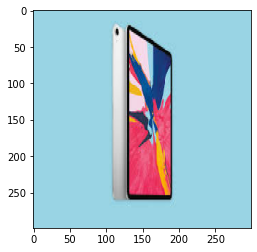

(1, 299, 299, 3)
{'ipad': 0.9865801, 'laptop': 0.000144035, 'mobile': 0.013275923}


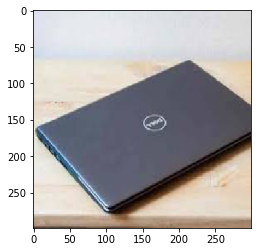

(1, 299, 299, 3)
{'ipad': 0.0011357975, 'laptop': 0.9929696, 'mobile': 0.005894612}


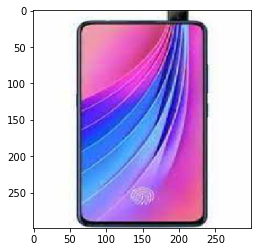

(1, 299, 299, 3)
{'ipad': 0.023414029, 'laptop': 0.00038016427, 'mobile': 0.9762058}


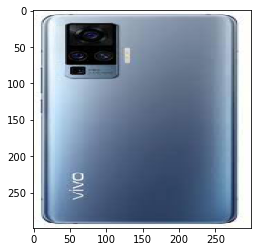

(1, 299, 299, 3)
{'ipad': 0.0016793135, 'laptop': 4.2771877e-05, 'mobile': 0.9982779}


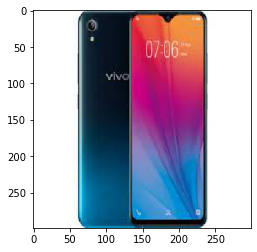

(1, 299, 299, 3)
{'ipad': 0.0051329653, 'laptop': 2.767938e-05, 'mobile': 0.9948394}


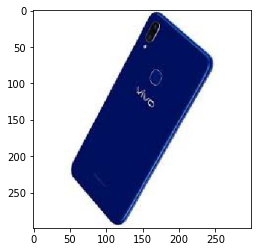

(1, 299, 299, 3)
{'ipad': 1.4183494e-05, 'laptop': 1.5175069e-06, 'mobile': 0.99998426}


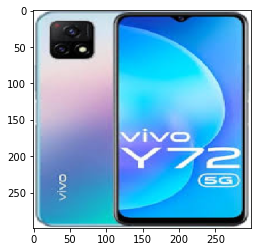

(1, 299, 299, 3)
{'ipad': 0.00072711357, 'laptop': 7.52865e-08, 'mobile': 0.99927276}


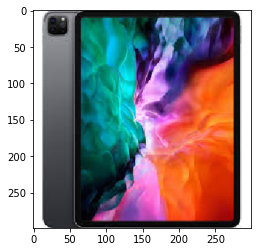

(1, 299, 299, 3)
{'ipad': 0.9996082, 'laptop': 0.00027219055, 'mobile': 0.00011960993}


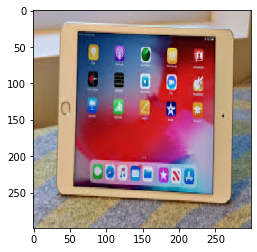

(1, 299, 299, 3)
{'ipad': 0.9999175, 'laptop': 1.4180025e-06, 'mobile': 8.108412e-05}


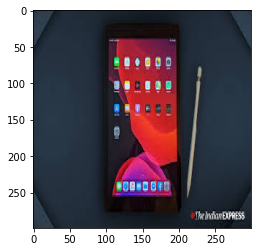

(1, 299, 299, 3)
{'ipad': 0.99994445, 'laptop': 2.6760279e-06, 'mobile': 5.2888045e-05}


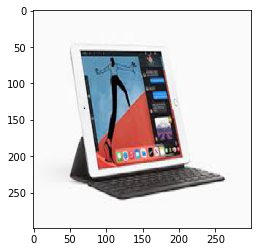

(1, 299, 299, 3)
{'ipad': 0.9913401, 'laptop': 0.008653976, 'mobile': 5.9101944e-06}


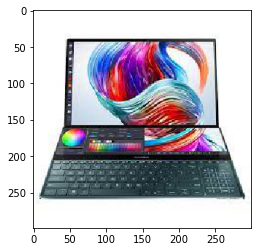

(1, 299, 299, 3)
{'ipad': 0.99720097, 'laptop': 0.0027228943, 'mobile': 7.6170196e-05}


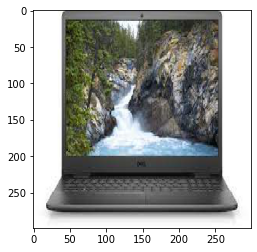

(1, 299, 299, 3)
{'ipad': 0.017582286, 'laptop': 0.98241675, 'mobile': 9.0311926e-07}


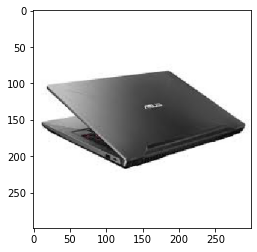

(1, 299, 299, 3)
{'ipad': 3.803339e-05, 'laptop': 0.99995494, 'mobile': 7.045884e-06}


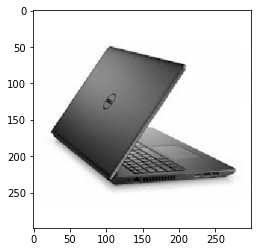

(1, 299, 299, 3)
{'ipad': 0.00024113896, 'laptop': 0.9997483, 'mobile': 1.0644948e-05}


In [12]:
path = "dataset/testing"
for i in os.listdir(path):
    img = image.load_img(path+ '//' +i, target_size=(299,299))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    img = np.array([x])
    print(img.shape)
    img = preprocess_input(img)
    prediction = model.predict(img)[0]
    res = {class_name[i]: prediction[i] for i in range(len(class_name))}
    print(str(res))